In [1]:
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
class GradientDescent():
  def __init__(self, lr = 0.1, m=200, n = 2, t = 1, iterations= 200):
    self.m = m
    self.n = n
    self.lr = lr
    self.t = t
    self.iterations = iterations
  
    self.costs = []
    self.w = np.zeros((n,t))

  def train(self, x, y):

    for _ in range(self.iterations):    
      hofx = np.dot(self.w.T, x)
      residuals = hofx - y
      gradient = np.dot(x, residuals.T)
      # weight update
      self.w = self.w - (self.lr/self.m) * gradient

      cost = (0.5/self.m) * np.sum(residuals**2)
      self.costs.append(cost)
    print ("Costs", self.costs)
    return self, hofx

  def predict(self, x):
    return np.dot(self.w.T, x)

class StochasticGradientDescent(GradientDescent):
  def __init__(self, epochs = 200, bs = 10, shuffle=True ):
    super().__init__()
    self.epochs = epochs
    self.batch_size = bs
    self.shuffle = shuffle
    self.iterations = int(self.m/self.batch_size)
    # self.w = np.zeros(())
  def train(self, x, y):
    for _ in range(self.epochs):
      cost = 0.
      hofxs = []
      for idx in range(self.iterations):
        data_start = idx*self.batch_size
        data_end = data_start+self.batch_size
        # print ( data_start, data_end)

        hofx = np.dot(self.w.T, x[:, data_start:data_end])
        residuals = hofx - y[data_start:data_end]
        # print(residuals, hofx)
        # print(x[:, data_start:data_end].shape, residuals.shape)
        gradient = np.dot(x[:, data_start:data_end], residuals.T)
        self.w = self.w - (self.lr/self.batch_size) * gradient
        cost += 0.5/self.batch_size * np.sum(residuals**2)
        hofxs.append(hofx)
      self.costs.append(cost/self.iterations)
    print ("Costs:", self.costs)
    return self, hofxs

## Creating data

In [3]:
m = 200 # num of samples
n=2 # num of features x1, x2 ... xn
t=1 # num of output variables predicted
x = np.random.rand(n,m) if n==1 else np.squeeze(np.stack((np.random.rand(n-1,m), np.ones((1,m))), axis = 0))
x = np.sort(x, axis=1)
# print(x)
y = np.array([ ((2.0+ 5*np.random.rand()) * x_ + 3) for x_ in x]) if n==1 else np.array([ ((2.0+ 5*np.random.rand()) * x_[1] + 3 * x_[0]) for x_ in zip(*x)])

## Gradient descent

In [5]:
print ( '-'*10, "GD", '-'*10)
gd = GradientDescent()
_, pred_sd = gd.train(x, y)
test_x = np.array((1., 0.4))
print( "Input", test_x, "Output", gd.predict(test_x))


---------- GD ----------
Costs [18.687194547780166, 14.430579821304095, 11.195400746272428, 8.736545980095393, 6.8677229764308185, 5.447343375456524, 4.367795444217864, 3.547290784519794, 2.923667567366726, 2.4496807908240545, 2.0894227237486143, 1.8156023273131292, 1.6074775274208208, 1.4492836749001428, 1.3290391244518345, 1.237637436038223, 1.1681574185937902, 1.1153387409417348, 1.0751833791390955, 1.0446527035752935, 1.0214372553748632, 1.0037817690210686, 0.9903521838932592, 0.9801345687359657, 0.9723583009877299, 0.9664376805873767, 0.9619275545790472, 0.9584895903772028, 0.9558666423574306, 0.9538632696364823, 0.9523309289549755, 0.9511567207892457, 0.9502548360322206, 0.9495600551940474, 0.9490228075840906, 0.9486054161291998, 0.9482792433138737, 0.9480225220022005, 0.9478187067920908, 0.9476552209908812, 0.9475225042759772, 0.9474132888858473, 0.9473220495014749, 0.9472445851381781, 0.947177701369581, 0.9471189688072661, 0.9470665395372145, 0.9470190076052812, 0.9469753029813

## Stochastic gradient descent


In [6]:
print( '-'*10, "SGD", '-'*10)
print("main", x.shape, y.shape)
sgd = StochasticGradientDescent()
_, pred_sgd = sgd.train(x,y)
print( "Input", test_x, "Output", sgd.predict(test_x))

---------- SGD ----------
main (2, 200) (200,)
Costs: [4.486342002278294, 0.9776167180466754, 0.9838727130767919, 0.9771909926719049, 0.9710079915549482, 0.9663475253582513, 0.9629003044968615, 0.9603703016770773, 0.9585293706553142, 0.9572042580784768, 0.9562637223038399, 0.9556085315237608, 0.9551638152383639, 0.9548732240333218, 0.9546944727645702, 0.9545959414985419, 0.954554084948452, 0.9545514596653633, 0.9545752230506833, 0.9546159925623282, 0.954666979748753, 0.9547233338467279, 0.9547816450629256, 0.9548395694312009, 0.9548955461433966, 0.9549485851399, 0.9549981080136073, 0.9550438293076826, 0.9550856683647322, 0.9551236842357629, 0.95515802795226, 0.9551889078346185, 0.9552165645550541, 0.9552412534695709, 0.9552632323401706, 0.9552827530300954, 0.9553000561057976, 0.9553153675457647, 0.9553288969583107, 0.9553408368633672, 0.9553513627088286, 0.9553606333790718, 0.9553687920187637, 0.9553759670441135, 0.9553822732503725, 0.9553878129516095, 0.9553926771089115, 0.95539694641

## Visualize predictions

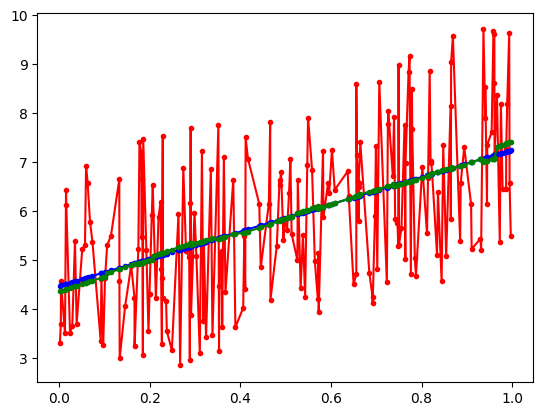

In [7]:
plt.plot(x[0,:], y, 'r.-')
plt.plot(x[0,:], np.squeeze(pred_sd), 'b.-') # predicted line from GD
plt.plot(x[0,:], np.squeeze(pred_sgd).reshape(200,-1), 'g.-') # predicted line from SGD